<a href="https://colab.research.google.com/github/ChristinaCh19/Projects-2025/blob/main/Project_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Predicting Cognitive Decline from Speech Patterns
  ## (Linear Regression Model)

Case: A group of people (n = 100) of age between 30 and 85 years were given a written cognitive test (score: 1-100) and where recorded for mean sentence length in a speach test (score: 1-100).

The results were plotted and a Linear Regression Model was applied in order to detect whethere there is linear relationship between speech patterns (predictor) and cognitive decline (outcome).


In [52]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
!ls "/content/drive/MyDrive/Colab Notebooks/"

project_1_data.json  Untitled0.ipynb


In [54]:
file_path = "/content/drive/MyDrive/Colab Notebooks/project_1_data.json"

df = pd.read_json(file_path)



## Taking a look at the data:

In [73]:
df.head()

,id,mean_sentence_length,cognitive_test_score
0,1,33,44
1,2,15,31
2,3,84,84
3,4,81,73
4,5,3,13


In [74]:
x_values = np.array(df['mean_sentence_length'])
y_values = np.array(df['cognitive_test_score'])

print(x_values)
print(y_values)

[ 33  15  84  81   3  99  27  70  20  62  74   4  55   1  27  85   5  10
  23  36  60  48  41  71  38  15  56   4  50   9  67  70  71  95  30  54
  30  57  99  14  99  69  48  28  65  55   1  34  14   8  66  86  26  55
  41  29  84  98  72  81  95   1  24  48  58  56  48  89  29  94  15  48
  91  64  45  16  43  41  99  67  26  28  37  50 100  59  25  56  85  97
  75  10  72  41  35  53  68  46  86  53]
[ 44  31  84  73  13  87  23  80  47  53  84  15  58   8  23  69  21  11
  24  58  57  44  52  84  43  24  57  11  67  18  68  84  70  95  43  49
  42  50  87  36  92  80  61  38  77  74  11  56  34  14  77  84  50  66
  60  42  71  88  80  87  93   9  24  60  56  74  55  81  30  98  26  56
  88  56  39  22  44  53  94  62  27  41  46  53  81  54  31  59  91 102
  72  17  77  50  51  55  85  43  86  48]


In [85]:
summary = df[['mean_sentence_length', 'cognitive_test_score']].describe()
summary = summary.round(2)
print(summary)

       mean_sentence_length  cognitive_test_score
count                100.00                100.00
mean                  50.25                 55.18
std                   28.56                 24.92
min                    1.00                  8.00
25%                   27.75                 38.75
50%                   50.00                 55.50
75%                   71.00                 77.00
max                  100.00                102.00


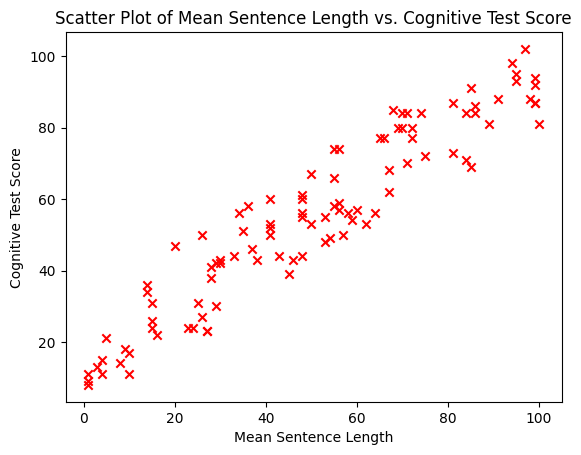

In [86]:
import matplotlib.pyplot as plt

plt.scatter(x_values, y_values, marker='x', c='r')
plt.xlabel('Mean Sentence Length')
plt.ylabel('Cognitive Test Score')
plt.title('Scatter Plot of Mean Sentence Length vs. Cognitive Test Score')
plt.show()

## Compute the Cost Function

In [59]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost_sum = 0
    total_cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i])**2
        cost_sum += cost

    total_cost = (1 / (2*m)) * cost_sum

    return total_cost

In [60]:
print(f"{compute_cost(x_values, y_values, 2, 1):.2f}")

1661.97


## Compute the Gradient Function

In [61]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]

        dj_dw += dj_dw_i
        dj_db += dj_db_i

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db


In [62]:
print(compute_gradient(x_values, y_values, 2, 1))

(3276.05, 46.32)


## Compute Gradient Descent Function

In [68]:
import copy
import math

def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)

    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            cost = cost_function(x, y, w, b)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f} ")

    return w, b, J_history, w_history

In [69]:
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.00001

w,b,_,_ = gradient_descent(x_values ,y_values, initial_w, initial_b,
                           compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)


Iteration    0: Cost  1713.53 
Iteration  150: Cost    54.97 
Iteration  300: Cost    54.89 
Iteration  450: Cost    54.87 
Iteration  600: Cost    54.85 
Iteration  750: Cost    54.84 
Iteration  900: Cost    54.82 
Iteration 1050: Cost    54.80 
Iteration 1200: Cost    54.79 
Iteration 1350: Cost    54.77 
w,b found by gradient descent: 1.0310995300657784 0.06518052417544372


## Calculate Prediction

In [70]:
m = x_values.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_values[i] + b

## Plot the data on a scatterplot and show the regression line

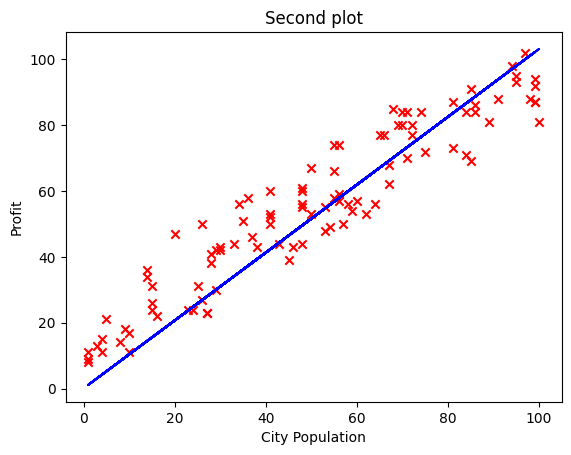

In [72]:
plt.plot(x_values, predicted, c='b')

plt.scatter(x_values, y_values, marker='x', c='r')

plt.title('Second plot')
plt.ylabel('Profit')
plt.xlabel('City Population')
plt.show()
